# Calidad de los datos para tabla Players

## 0. Librerias

In [199]:
import sqlite3
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Extraccion de los datos

In [200]:
tabla1 = 'League'
tabla2 = 'Country'

In [201]:
conn = sqlite3.connect('database.sqlite')
league = pd.read_sql_query(f"SELECT * FROM {tabla1}", conn)



In [202]:
print(f"{tabla1} shape: ", league.shape)


League shape:  (11, 3)


In [203]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [204]:
league.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [205]:
conn = sqlite3.connect('database.sqlite')
country = pd.read_sql_query(f"SELECT * FROM {tabla2}", conn)
print(f"{tabla2} shape: ", country.shape)

Country shape:  (11, 2)


In [206]:
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [207]:
country.dtypes

id       int64
name    object
dtype: object

## 1.1. Columnas numericas 

In [208]:
#number_cols = league.dtypes[(league.dtypes == np.int64) | (league.dtypes == np.float64)].index
integer_cols = league.select_dtypes(include = ['int']).columns
float_cols = league.select_dtypes(include = ['float']).columns

number_cols = league.select_dtypes(include = ['int','float']).columns
number_cols 

Index(['id', 'country_id'], dtype='object')

## 1.2. Columnas categoricas 

In [209]:
#non_number_cols = league.columns.difference(number_cols) 
#non_number_cols = league.dtypes[(league.dtypes != np.int64) & (league.dtypes != np.float64)].index 

object_cols = league.select_dtypes(include = ['object']).columns
boolean_cols = league.select_dtypes(include = ['bool']).columns
date_cols = league.select_dtypes(include = ['datetime']).columns

non_number_cols = league.select_dtypes(include = ['object','bool','datetime']).columns
non_number_cols

Index(['name'], dtype='object')

## 1.3 Correlacion

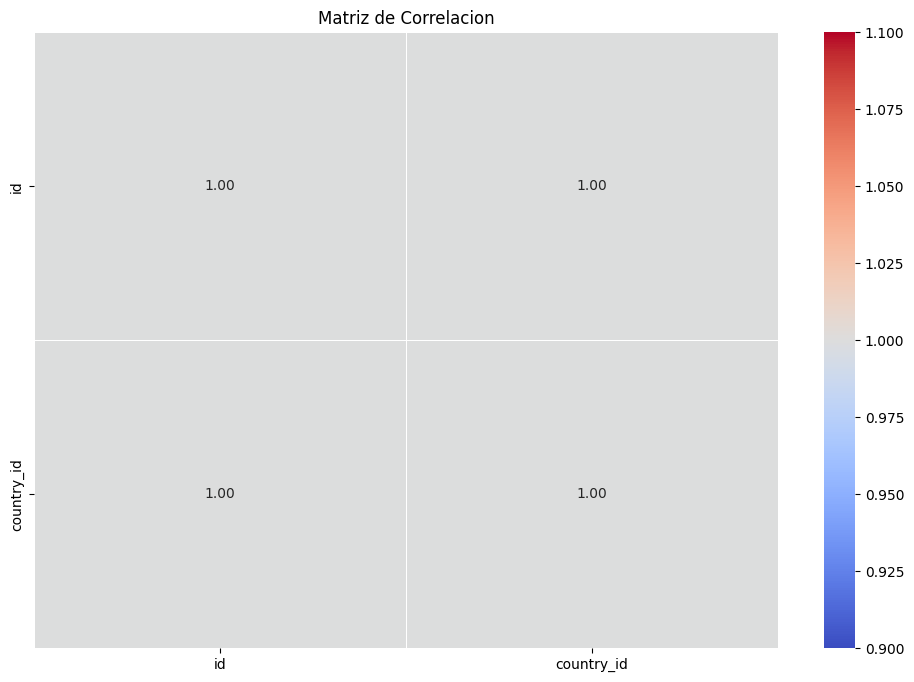

In [210]:
import numpy as np

matriz_correlaciones = league[number_cols].corr()

mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, mask=None, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlacion")
plt.show()

# 2. Calidad de los datos

In [211]:
league_t = league.copy()
league_t.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [212]:
country_t = country.copy()
country_t.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


## 2.1. Completitud

In [213]:
print("League: numero de nulos por columna: ")
league_t.isnull().sum().sort_values(ascending=False)

League: numero de nulos por columna: 


id            0
country_id    0
name          0
dtype: int64

In [214]:
print("Country: numero de nulos por columna: ")
country.isnull().sum().sort_values(ascending=False)

Country: numero de nulos por columna: 


id      0
name    0
dtype: int64

## 2.2. Unicidad

In [215]:
print("League: duplicados ")
num_duplicated = league_t.duplicated(subset = "name").sum()
print(f"{"name"}: {num_duplicated}")

League: duplicados 
name: 0


In [216]:
print("League: duplicados ")
league_t.loc[league_t.duplicated(keep=False)]

League: duplicados 


,id,country_id,name


In [217]:
print("Country: duplicados")
num_duplicated = league_t.duplicated(subset = "name").sum()
print(f"{"name"}: {num_duplicated}")

Country: duplicados
name: 0


In [218]:
print("Country: duplicados ")
country_t.loc[league_t.duplicated(keep=False)]

Country: duplicados 


,id,name


## 2.3. Consistencia

In [219]:
league_t.value_counts("name")

name
Belgium Jupiler League      1
England Premier League      1
France Ligue 1              1
Germany 1. Bundesliga       1
Italy Serie A               1
Netherlands Eredivisie      1
Poland Ekstraklasa          1
Portugal Liga ZON Sagres    1
Scotland Premier League     1
Spain LIGA BBVA             1
Switzerland Super League    1
Name: count, dtype: int64

In [220]:
country_t.value_counts("name")

name
Belgium        1
England        1
France         1
Germany        1
Italy          1
Netherlands    1
Poland         1
Portugal       1
Scotland       1
Spain          1
Switzerland    1
Name: count, dtype: int64

In [221]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [222]:
# Chequeos básicos
is_unique_fk  = league["country_id"].is_unique                 # cada país aparece una sola vez en League
is_unique_dim = country["id"].is_unique                        # id de Country es único (PK)
covered       = set(league["country_id"]) == set(country["id"])# mismos IDs en ambos lados (sin perdidos)

print("League.country_id único?:", is_unique_fk)
print("Country.id único?:", is_unique_dim)
print("Conjunto de IDs coincide?:", covered)

# Anti-joins útiles
fk_not_in_country = league.loc[~league["country_id"].isin(country["id"])]
country_not_ref   = country.loc[~country["id"].isin(league["country_id"])]

print("Filas en League con country_id sin match en Country:", len(fk_not_in_country))
print("Países en Country no referenciados por League:", len(country_not_ref))


League.country_id único?: True
Country.id único?: True
Conjunto de IDs coincide?: True
Filas en League con country_id sin match en Country: 0
Países en Country no referenciados por League: 0


In [223]:
# Esto lanza un MergeError si NO es 1–a–1
Merge = league.merge(country, left_on="country_id", right_on="id", how="inner", validate="one_to_one")
print("OK: relación one-to-one validada.")


OK: relación one-to-one validada.


In [224]:
Merge

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


## 2.4. Validez

In [225]:
league_t.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [226]:
league_t.value_counts()

id     country_id  name                    
1      1           Belgium Jupiler League      1
1729   1729        England Premier League      1
4769   4769        France Ligue 1              1
7809   7809        Germany 1. Bundesliga       1
10257  10257       Italy Serie A               1
13274  13274       Netherlands Eredivisie      1
15722  15722       Poland Ekstraklasa          1
17642  17642       Portugal Liga ZON Sagres    1
19694  19694       Scotland Premier League     1
21518  21518       Spain LIGA BBVA             1
24558  24558       Switzerland Super League    1
Name: count, dtype: int64

In [227]:
country_t.dtypes

id       int64
name    object
dtype: object

In [228]:
country_t.value_counts()

id     name       
1      Belgium        1
1729   England        1
4769   France         1
7809   Germany        1
10257  Italy          1
13274  Netherlands    1
15722  Poland         1
17642  Portugal       1
19694  Scotland       1
21518  Spain          1
24558  Switzerland    1
Name: count, dtype: int64